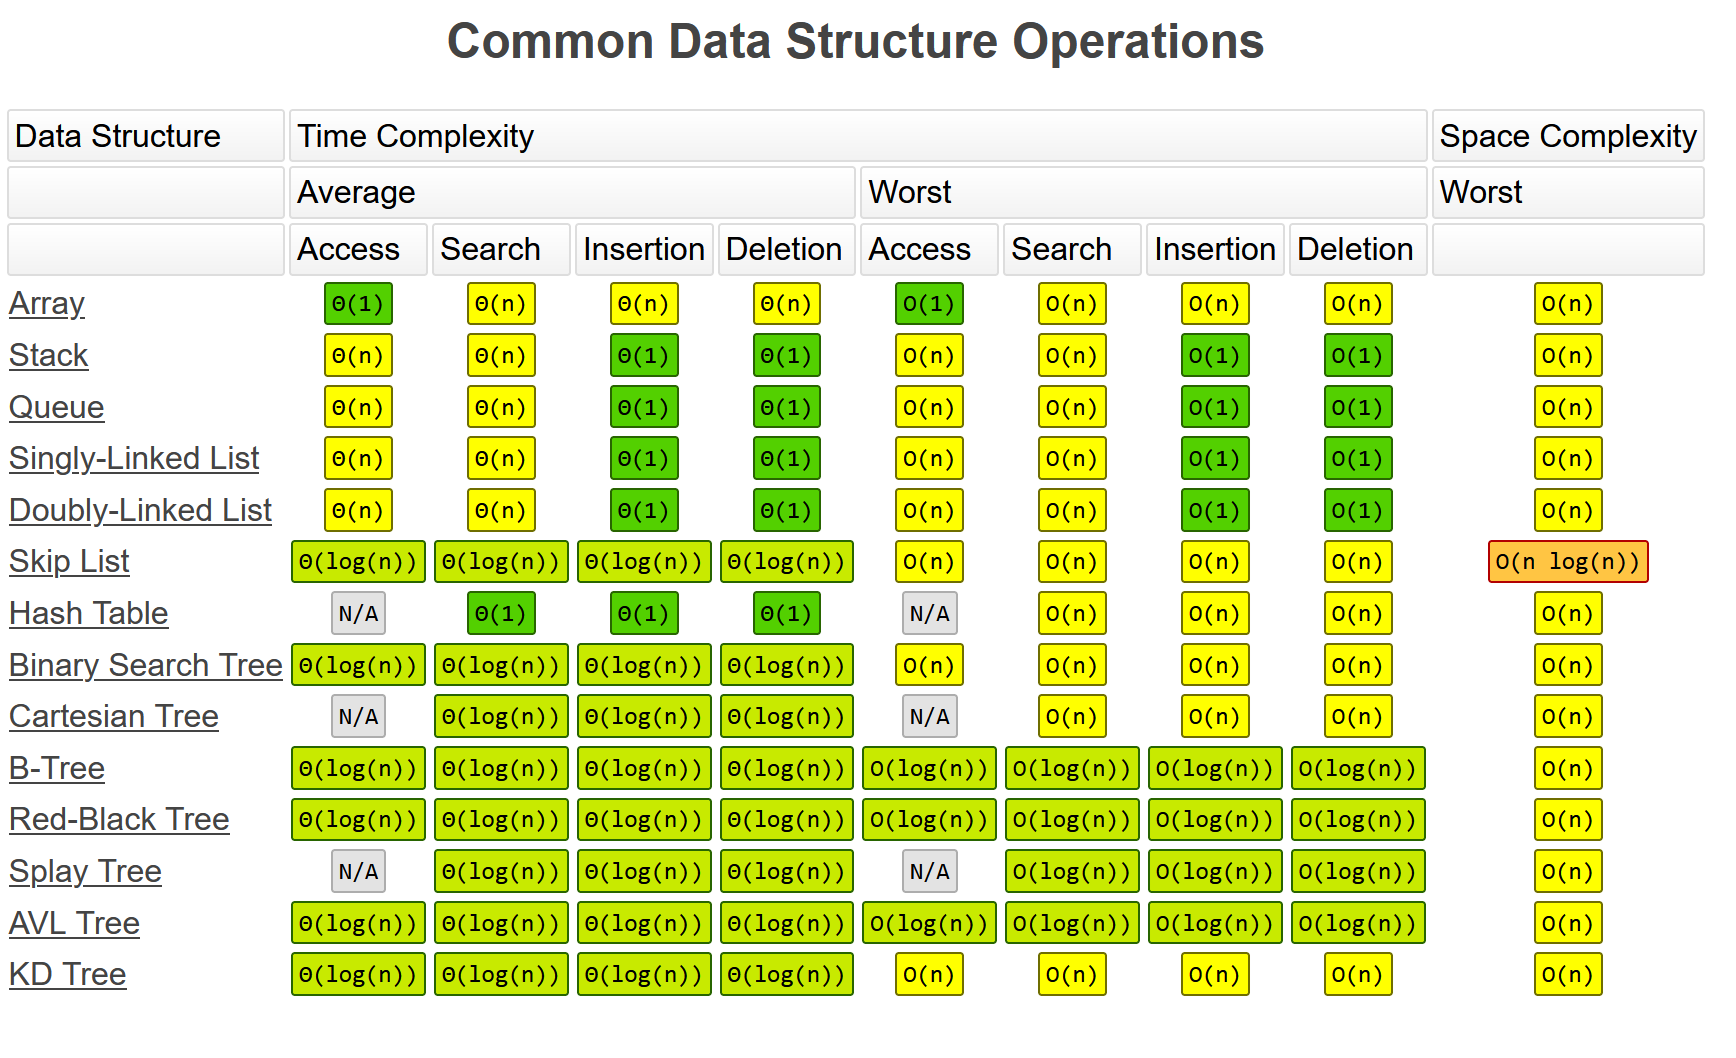

Linked Lists

In [132]:
class OneWayList:
    head = None

    class Node:

        def __init__(self, element=None, next_node=None):
            self.element = element
            self.next_node = next_node

    def append(self, element):
        if not self.head:
            self.head = self.Node(element)
            return f"{element} appended"
        
        node = self.head

        while node.next_node:
            node = node.next_node

        node.next_node = self.Node(element)
        return f"{element} appended"

    def __iter__(self):
        node = self.head

        while node:
            yield node.element
            node = node.next_node

    def out(self):
        node = self.head
        print(node.element)

        while node.next_node:
            node = node.next_node
            print(node.element)
            
    def replace_elem_by_index(self, index, insert_element):
        node = self.head
        counter = 0
        
        while counter < index:
            node = node.next_node
            counter += 1

        node.element = insert_element

    def insert(self, left_index, element):
        node = self.head
        counter = 0
        
        while counter < left_index:
            node = node.next_node
            counter += 1

        node.next_node = self.Node(element, node.next_node)
        return f"{element} inserted between {left_index} and {left_index+1}"

    def get_by_index(self, index):
        node = self.head
        counter = 0
        
        while counter < index:
            node = node.next_node
            counter += 1

        return node.element

    def delete(self, index):
        if index == 0:
            element = self.head.element
            self.head = self.head.next_node
            return f"{element} has been deleted"

        node = self.head
        prev_node = node
        counter = 0

        while counter < index:
            prev_node = node
            node = node.next_node
            counter += 1
        
        prev_node.next_node = node.next_node
        element = node.element

        del node

        return f"{element} has been deleted"
    
    def get_lenght(self):
        if not self.head:
            return 0
        i = 1

        node = self.head
        while node.next_node:
            i += 1
            node = node.next_node
        return i

class TwoWayList:
    head = None

    class Node:

        def __init__(self,
                     element=None,
                     prev_node=None,
                     next_node=None):
            self.element = element
            self.prev_node = prev_node
            self.next_node = next_node

    def append(self, element):
        if not self.head:
            self.head = self.Node(element)
            return f"{element} appended"
        
        node = self.head

        while node.next_node:
            node = node.next_node
        
        node.next_node = self.Node(element, node, node.next_node)
        
        return f"{element} appended"

    def out(self):
        node = self.head
        print(node.element)

        while node.next_node:
            node = node.next_node
            print(node.element)
            
    def replace_elem_by_index(self, index, insert_element):
        node = self.head
        counter = 0
        
        while counter < index:
            node = node.next_node
            counter += 1

        node.element = insert_element

    def insert(self, left_index, element):
        node = self.head
        counter = 0
        
        while counter < left_index:
            node = node.next_node
            counter += 1

        node.next_node = self.Node(element, node, node.next_node)
        if node.next_node.next_node:
            node.next_node.next_node.prev_node = node.next_node
        return f"{element} inserted between {left_index} and {left_index+1}"

    def get_by_index(self, index):
        node = self.head
        counter = 0
        
        while counter < index:
            node = node.next_node
            counter += 1

        return node.element

    def delete(self, index):
        if index == 0:
            element = self.head.element
            self.head = self.head.next_node
            return f"{element} has been deleted"

        node = self.head
        prev_node = node
        counter = 0

        while counter < index:
            prev_node = node
            node = node.next_node
            counter += 1
        
        prev_node.next_node = node.next_node
        element = node.element

        del node

        return f"{element} has been deleted"
    
    def get_lenght(self):
        if not self.head:
            return 0
        i = 1

        node = self.head
        while node.next_node:
            i += 1
            node = node.next_node
        return i

Queue, Stack

In [43]:
class TwoWayStack:
    head = None
    tail = None

    class Node:

        def __init__(self,
                     element=None,
                     prev_node=None,
                     next_node=None):
            self.element = element
            self.prev_node = prev_node
            self.next_node = next_node

    def push(self, element):
        if not self.head:
            self.head = self.Node(element)
            return f"{element} added"

        prev_head = self.head

        self.head = self.Node(element, None, prev_head)
        self.head.next_node.prev_node = self.head

        return f"{element} added"
    
    def pop(self):
        if not self.head:
            return None
        
        element = self.head.element
        if self.head.next_node:
            self.head = self.head.next_node
            self.head.prev_node = None
        else:
            self.head = None
        return element

    def is_empty(self):
        if self.head:
            return False
        return True
    
    def __iter__(self):

        while self.head:
            yield self.pop()

    def out(self):
        node = self.head
        print(node.element)

        while node.next_node:
            node = node.next_node
            print(node.element)

    def min(self):
        head_cur = self.head

        if not head_cur.prev_node:
            head_min = head_cur

        while head_cur.next_node:
            head_cur = head_cur.next_node

        while head_cur.prev_node:
            head_min = head_cur
            prev_min = None

            prev_cur = head_cur.prev_node
                        

            if prev_cur.element <= head_min.element:
                min_node = prev_cur
            else:
                min_node = head_min

            print(min_node.element)
            prev_min = head_min
            head_min = min_node

            prev_min.prev_node = head_min
            head_min.next_node = prev_min

            head_cur = prev_cur

            print('/////')

        return head_min.element
       
    


Array

In [219]:
class FixedArray:

    memory_dict = {
        'int32' : 32,
        'float32' : 32,
        'str' : 64
    }

    reserved_size = 0

    def __init__(self, dtype, size):
        
        if dtype in self.memory_dict:
            self.cell_size = self.memory_dict[dtype]
        else:
            self.cell_size = 128

        self.reserved_size = size * self.cell_size
        self.cell_dict = {}

        i = 0
        while i < size:
            new_cell = self.Cell()
            self.cell_dict[(i * self.cell_size + 1)] = new_cell
            i += 1
        print(f"Array created with lenght of {len(self.cell_dict)}\
                and {self.reserved_size} of memory reserved")

    class Cell:

        def __init__(self, element=None):
            self.element = element
    

    def change_element(self, index, element):
        cell_adress = index * self.cell_size + 1
        self.cell_dict[cell_adress].element = element
        return f"Element at index {index} changed to {element}"

    def display(self):
        cell_adress = 1

        while cell_adress < self.reserved_size:
            print(self.cell_dict[cell_adress].element)
            cell_adress += self.cell_size

    def append_to_head(self):
        pass
    
    def append_to_tail(self):

        pass

    def insert(self, index):
        pass



Hash table

In [1]:
class HashTable:
 
    # Create empty bucket list of given size
    def __init__(self, size):
        self.size = size
        self.hash_table = self.create_buckets()
 
    def create_buckets(self):
        return [[] for _ in range(self.size)]
 
    # Insert values into hash map
    def set_val(self, key, val):
       
        # Get the index from the key
        # using hash function
        hashed_key = hash(key) % self.size
         
        # Get the bucket corresponding to index
        bucket = self.hash_table[hashed_key]
 
        found_key = False
        for index, record in enumerate(bucket):
            record_key, record_val = record
             
            # check if the bucket has same key as
            # the key to be inserted
            if record_key == key:
                found_key = True
                break
 
        # If the bucket has same key as the key to be inserted,
        # Update the key value
        # Otherwise append the new key-value pair to the bucket
        if found_key:
            bucket[index] = (key, val)
        else:
            bucket.append((key, val))
 
    # Return searched value with specific key
    def get_val(self, key):
       
        # Get the index from the key using
        # hash function
        hashed_key = hash(key) % self.size
         
        # Get the bucket corresponding to index
        bucket = self.hash_table[hashed_key]
 
        found_key = False
        for index, record in enumerate(bucket):
            record_key, record_val = record
             
            # check if the bucket has same key as
            # the key being searched
            if record_key == key:
                found_key = True
                break
 
        # If the bucket has same key as the key being searched,
        # Return the value found
        # Otherwise indicate there was no record found
        if found_key:
            return record_val
        else:
            return "No record found"
 
    # Remove a value with specific key
    def delete_val(self, key):
       
        # Get the index from the key using
        # hash function
        hashed_key = hash(key) % self.size
         
        # Get the bucket corresponding to index
        bucket = self.hash_table[hashed_key]
 
        found_key = False
        for index, record in enumerate(bucket):
            record_key, record_val = record
             
            # check if the bucket has same key as
            # the key to be deleted
            if record_key == key:
                found_key = True
                break
        if found_key:
            bucket.pop(index)
        return
 
    # To print the items of hash map
    def __str__(self):
        return "".join(str(item) for item in self.hash_table)
 
 

In [5]:
h = HashTable(3)
h.__str__()

'[][][]'

In [44]:
stack = TwoWayStack()

stack.push(2)
stack.push(10)
stack.push(1)
stack.push(2)
stack.push(2)
stack.out()
stack.min()

2
2
1
10
2
2
/////
1
/////
1
/////
2
/////


2

In [36]:
x = 2
y = x

x = 3
x, y

(3, 2)